## HW2
### Supervised Learning Models 
#### Gian Zlupko 

#### 1. Find the url for the California Test Score Data Set from the following website:

https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.  

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

The target data (i.e. the dependent variable) is named "testscr".  You can use all  variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).

In [39]:
import pandas as pd 

# load data
cal_data_full = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv") 

# subset the data to remove 'readscr' and 'mathscr' and the non-numeric data
cal_data = cal_data_full.loc[:, 'enrltot': 'elpct']


# print out first few rows after subsetting 
print(cal_data.head(5)) 

# store target and predictor variables 
y = cal_data['testscr']
X = cal_data.loc[:, cal_data.columns != 'testscr']


   enrltot   teachers    calwpct    mealpct  computer     testscr   compstu  \
0      195  10.900000   0.510200   2.040800        67  690.799988  0.343590   
1      240  11.150000  15.416700  47.916698       101  661.200012  0.420833   
2     1550  82.900002  55.032299  76.322601       169  643.599976  0.109032   
3      243  14.000000  36.475399  77.049202        85  647.700012  0.349794   
4     1335  71.500000  33.108601  78.427002       171  640.849976  0.128090   

       expnstu        str     avginc      elpct  
0  6384.911133  17.889910  22.690001   0.000000  
1  5099.380859  21.524664   9.824000   4.583333  
2  5501.954590  18.697226   8.978000  30.000002  
3  7101.831055  17.357143   8.978000   0.000000  
4  5235.987793  18.671329   9.080333  13.857677  


#### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature. 

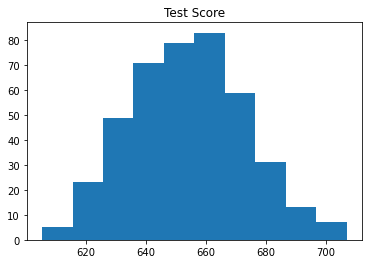

In [20]:
import matplotlib.pyplot as plt 

# visualize the target feature: testscr 
plt.hist(y)
plt.title('Test Score') 
plt.show()

The target variable, test score, appears to be normally distributed. Next, per my review of the data dictionary, I visualize three predictor variables that I believe will be related to the target variable, test scores. In particular, I've selected income ('avginc'; e.g. district avg. income), expenditure ('expnstu'; e.g. avg. school spending per student), and teachers (e.g. no. teachers per district)

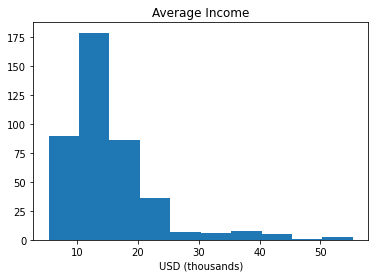

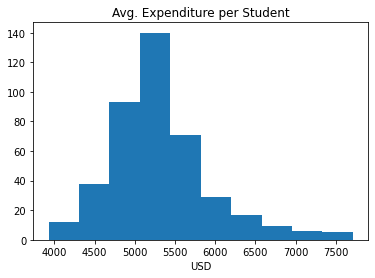

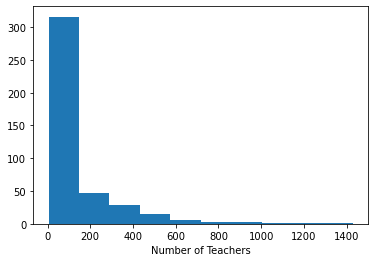

In [38]:
# plot average income
plt.hist(X['avginc']) 
plt.title("Average Income")
plt.xlabel('USD (thousands)')
plt.show() 

# plot avg. expenditure per student 

plt.hist(X['expnstu'])
plt.title('Avg. Expenditure per Student')
plt.xlabel('USD')
plt.show() 

# plot number of teachers 
plt.hist(X['teachers'])
plt.xlabel('Number of Teachers')
plt.show() 




The average spending (expenditure) per student appears to be fairly normally distributed. In contrast, the number of teachers per district is severly right skewed with the majority of districts possessing fewer than 200 teachers. Finally, the average income for each district was also slightly right skewed, though not as severly as the teacher distribution. 

#### 1.2 Visualize the dependency of the target on each feature from 1.1.

To accomplish this, I use scatterplots to visualize the bivariate relationships between the predictor variables presented above and test scores. To do so, instead of generating three scatterplots, I used the scatter grid plot from seaborn. Doing so does present the univariate distributions again but I like the efficient use of space that scatter grid offers for this task. 

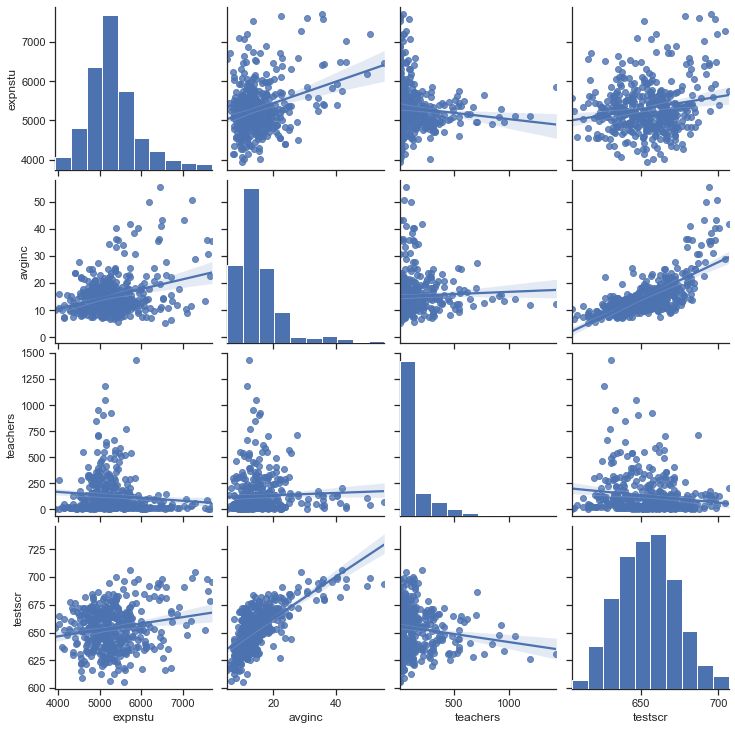

In [43]:
import seaborn as sns; sns.set(style = 'ticks', color_codes = True)

# create a subset of the original data 
plot_df = cal_data_full[['expnstu', 'avginc', 'teachers', 'testscr']]

# create the seaborn scatter plot grid with regression lines 
sns.pairplot(plot_df, kind = "reg")  


#### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [45]:
# set up training and test data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 300) 
